In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
conn = sqlite3.connect('zippedData/im.db')

df = pd.read_sql("""

SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
JOIN movie_akas
    USING(movie_id)


""", conn)

In [3]:
df.drop_duplicates(subset=['movie_id'], inplace=True)
df.drop(columns=['primary_title', 'original_title', 'ordering', 'region', 'types', 'attributes', 'is_original_title'], inplace=True)

In [4]:
df

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,language
0,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,Sangharsh,hi
5,tt0066787,2019,114.0,"Biography,Drama",7.2,43,One Day Before the Rainy Season,en
9,tt0069049,2018,122.0,Drama,6.9,4517,O Outro Lado do Vento,None
22,tt0069204,2018,NaN,"Comedy,Drama",6.1,13,Subse Bada Sukh,bn
25,tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,La Telenovela Errante,None
...,...,...,...,...,...,...,...,...
261792,tt9899860,2019,100.0,"Drama,Thriller",8.1,7,Watching This Movie Is a Crime,en
261795,tt9899880,2018,85.0,Comedy,5.8,5,Columbus,None
261797,tt9903952,2018,87.0,"Comedy,Horror",9.2,5,BADMEN with a good behavior,None
261800,tt9905462,2019,111.0,Drama,8.4,600,Pengalila,None


In [5]:
df2 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

In [6]:
df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [7]:
df2.rename(columns={'movie': 'title'}, inplace=True)

In [8]:
merged = df.merge(df2, on='title')

In [9]:
merged.columns

Index(['movie_id', 'start_year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'title', 'language', 'id', 'release_date',
       'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [10]:
merged.genres = merged.genres.str.split(',')

In [11]:
merged.genres

0                          [Horror]
1          [Comedy, Drama, Romance]
2                           [Drama]
3                [Horror, Thriller]
4       [Action, Adventure, Sci-Fi]
                   ...             
1223     [Biography, Comedy, Drama]
1224                  [Documentary]
1225                  [Documentary]
1226                  [Documentary]
1227             [Biography, Drama]
Name: genres, Length: 1228, dtype: object

In [12]:
merged.drop(columns=['language'], inplace=True)

In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 0 to 1227
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1228 non-null   object 
 1   start_year         1228 non-null   int64  
 2   runtime_minutes    1127 non-null   float64
 3   genres             1225 non-null   object 
 4   averagerating      1228 non-null   float64
 5   numvotes           1228 non-null   int64  
 6   title              1228 non-null   object 
 7   id                 1228 non-null   int64  
 8   release_date       1228 non-null   object 
 9   production_budget  1228 non-null   object 
 10  domestic_gross     1228 non-null   object 
 11  worldwide_gross    1228 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 124.7+ KB


In [14]:
merged.dropna(subset=['genres'], inplace=True)

In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1227
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1225 non-null   object 
 1   start_year         1225 non-null   int64  
 2   runtime_minutes    1127 non-null   float64
 3   genres             1225 non-null   object 
 4   averagerating      1225 non-null   float64
 5   numvotes           1225 non-null   int64  
 6   title              1225 non-null   object 
 7   id                 1225 non-null   int64  
 8   release_date       1225 non-null   object 
 9   production_budget  1225 non-null   object 
 10  domestic_gross     1225 non-null   object 
 11  worldwide_gross    1225 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 124.4+ KB


In [16]:
genre_columns = []

for i in merged.genres:
    for x in i:
        genre_columns.append(x)

genre_columns = list(set(genre_columns))

genre_columns

['Comedy',
 'News',
 'Horror',
 'Crime',
 'Adventure',
 'Drama',
 'Animation',
 'Music',
 'History',
 'Documentary',
 'Sci-Fi',
 'Romance',
 'Fantasy',
 'Western',
 'Mystery',
 'Action',
 'Sport',
 'Musical',
 'War',
 'Family',
 'Biography',
 'Thriller']

In [17]:
def binary_genres(lst, genre):
    
    if genre in lst:
        return 1
    else:
        return 0
    
merged['Comedy'] = merged.genres.apply(lambda x: binary_genres(x, 'Comedy'))

In [18]:
merged.Comedy

0       0
1       1
2       0
3       0
4       0
       ..
1223    1
1224    0
1225    0
1226    0
1227    0
Name: Comedy, Length: 1225, dtype: int64

In [19]:
genre_columns

['Comedy',
 'News',
 'Horror',
 'Crime',
 'Adventure',
 'Drama',
 'Animation',
 'Music',
 'History',
 'Documentary',
 'Sci-Fi',
 'Romance',
 'Fantasy',
 'Western',
 'Mystery',
 'Action',
 'Sport',
 'Musical',
 'War',
 'Family',
 'Biography',
 'Thriller']

In [20]:
#looping through genre columns to apply binary_genres function to add new columns
for i in genre_columns:
    merged[i] = merged.genres.apply(lambda x: binary_genres(x, i))

In [21]:
merged

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Fantasy,Western,Mystery,Action,Sport,Musical,War,Family,Biography,Thriller
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014","$3,300,000",...,0,0,0,0,0,0,0,0,0,0
1,tt0393049,2010,98.0,"[Comedy, Drama, Romance]",5.5,106,Anderson's Cross,65,"Dec 31, 2010","$300,000",...,0,0,0,0,0,0,0,0,0,0
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997","$36,000,000",...,0,0,0,0,0,0,0,0,0,0
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012","$1,000,000",...,0,0,0,0,0,0,0,0,0,1
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019","$170,000,000",...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,tt8266310,2019,117.0,"[Biography, Comedy, Drama]",6.2,173,Blinded by the Light,64,"Aug 14, 2019","$15,000,000",...,0,0,0,0,0,0,0,0,1,0
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998","$53,000,000",...,0,0,0,0,0,0,0,0,0,0
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018","$5,000,000",...,0,0,0,0,0,0,0,0,0,0
1226,tt8816388,2018,28.0,[Documentary],5.7,7,Demonic,56,"Oct 10, 2017","$3,000,000",...,0,0,0,0,0,0,0,0,0,0


In [22]:
#converting production_budget type from str -> float
merged.production_budget = merged['production_budget'].str.strip('$')
merged.production_budget = merged['production_budget'].str.replace(',', '')
merged.production_budget = merged.production_budget.astype('float')

In [23]:
#converting worldwide_gross type from str -> float
merged.worldwide_gross = merged['worldwide_gross'].str.strip('$')
merged.worldwide_gross = merged['worldwide_gross'].str.replace(',', '')
merged.worldwide_gross = merged.worldwide_gross.astype('float')

In [24]:
#converting domestic_gross type from str -> float
merged.domestic_gross = merged['domestic_gross'].str.strip('$')
merged.domestic_gross = merged['domestic_gross'].str.replace(',', '')
merged.domestic_gross = merged.domestic_gross.astype('float')

In [25]:
#created a dataframe without zero values for worldwide_gross and domestic_gross

main_df = merged[(merged.worldwide_gross != 0) & (merged.domestic_gross != 0)]

In [26]:
#calculated return on investment (ROI) for movies-- worldwide and domestic 
#metric to measure the rate of return on money budgeted for production 

main_df['ROI_worldwide'] = ((main_df.worldwide_gross - main_df.production_budget)/ main_df.production_budget) *100
main_df['ROI_domestic'] = ((main_df.domestic_gross - main_df.production_budget)/ main_df.production_budget) *100

<ipython-input-26-cf914e6dd36e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['ROI_worldwide'] = ((main_df.worldwide_gross - main_df.production_budget)/ main_df.production_budget) *100
<ipython-input-26-cf914e6dd36e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['ROI_domestic'] = ((main_df.domestic_gross - main_df.production_budget)/ main_df.production_budget) *100


In [27]:
#calcuated gross profit margin for movies -- worldwide and domestic
#assess how efficiently the company generates profit from sales of products

main_df['gross_profit_margin_worldwide'] = ((main_df.worldwide_gross - main_df.production_budget)/ main_df.worldwide_gross
                                           )*100
main_df['gross_profit_margin_domestic'] = ((main_df.domestic_gross - main_df.production_budget)/ main_df.domestic_gross
                                           )*100

<ipython-input-27-49c123f48592>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['gross_profit_margin_worldwide'] = ((main_df.worldwide_gross - main_df.production_budget)/ main_df.worldwide_gross
<ipython-input-27-49c123f48592>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['gross_profit_margin_domestic'] = ((main_df.domestic_gross - main_df.production_budget)/ main_df.domestic_gross


In [28]:
main_df['num_of_genres'] = main_df.genres.apply(lambda x: len(x))

<ipython-input-28-f425d3a661b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['num_of_genres'] = main_df.genres.apply(lambda x: len(x))


In [29]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 1227
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   movie_id                       983 non-null    object 
 1   start_year                     983 non-null    int64  
 2   runtime_minutes                902 non-null    float64
 3   genres                         983 non-null    object 
 4   averagerating                  983 non-null    float64
 5   numvotes                       983 non-null    int64  
 6   title                          983 non-null    object 
 7   id                             983 non-null    int64  
 8   release_date                   983 non-null    object 
 9   production_budget              983 non-null    float64
 10  domestic_gross                 983 non-null    float64
 11  worldwide_gross                983 non-null    float64
 12  Comedy                         983 non-null    in

In [30]:
def rating_scale(rating):
    if rating >= 7:
        return 'great'
    elif rating < 7 and rating >= 5:
        return 'good'
    else:
        return 'bad'

In [31]:
main_df['rating'] = main_df.averagerating.apply(lambda x: rating_scale(x))

<ipython-input-31-f7ddebe4a492>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['rating'] = main_df.averagerating.apply(lambda x: rating_scale(x))


In [32]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 1227
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   movie_id                       983 non-null    object 
 1   start_year                     983 non-null    int64  
 2   runtime_minutes                902 non-null    float64
 3   genres                         983 non-null    object 
 4   averagerating                  983 non-null    float64
 5   numvotes                       983 non-null    int64  
 6   title                          983 non-null    object 
 7   id                             983 non-null    int64  
 8   release_date                   983 non-null    object 
 9   production_budget              983 non-null    float64
 10  domestic_gross                 983 non-null    float64
 11  worldwide_gross                983 non-null    float64
 12  Comedy                         983 non-null    in

Analysis of Genres

*Does number of genres of a movie affect its return on investment (ROI)

*Does the type of genre of a movie affect its ROI?

*Does the type of genre affect a movie's rating?

In [33]:
grouped_by_num_of_genres = main_df.groupby(['num_of_genres']).mean()

Text(0.5, 1.0, 'ROI of Movies based on # of Genres (worldwide)')

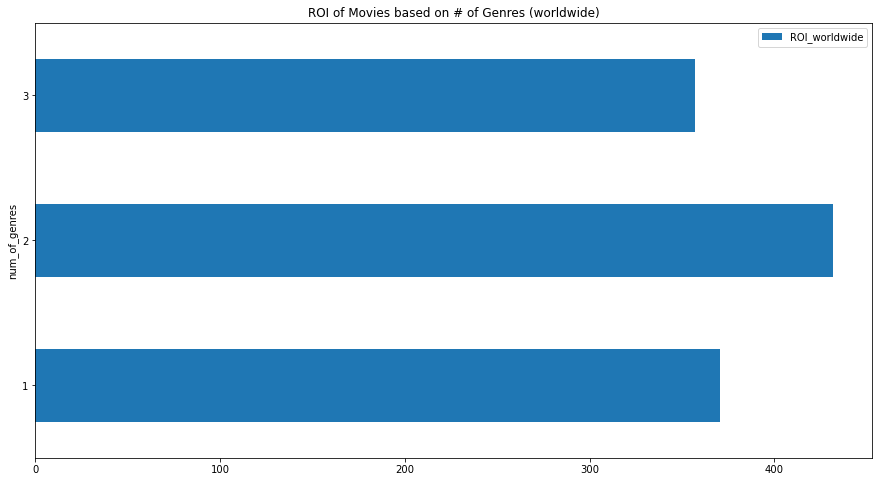

In [34]:
grouped_by_num_of_genres[['ROI_worldwide']].plot(kind='barh', figsize=(15,8))
plt.title('ROI of Movies based on # of Genres (worldwide)')

In [35]:
genre_amt = []
for i in genre_columns:
    print('The amount of movies that are {} is {}'.format(i, merged[i].sum()))
    genre_amt.append(merged[i].sum())

# Movie count by Genre

The amount of movies that are Comedy is 241
The amount of movies that are News is 5
The amount of movies that are Horror is 158
The amount of movies that are Crime is 131
The amount of movies that are Adventure is 106
The amount of movies that are Drama is 606
The amount of movies that are Animation is 28
The amount of movies that are Music is 25
The amount of movies that are History is 27
The amount of movies that are Documentary is 159
The amount of movies that are Sci-Fi is 82
The amount of movies that are Romance is 95
The amount of movies that are Fantasy is 47
The amount of movies that are Western is 7
The amount of movies that are Mystery is 79
The amount of movies that are Action is 209
The amount of movies that are Sport is 29
The amount of movies that are Musical is 15
The amount of movies that are War is 11
The amount of movies that are Family is 55
The amount of movies that are Biography is 75
The amount of movies that are Thriller is 216


In [36]:
def average(lst):
    return sum(lst) / len(lst)
average(genre_amt)

# Average movie count by genre

109.36363636363636

In [37]:
import statistics

statistics.median(genre_amt)

# Median movie count by genre

77.0

109.36363636363636
77.0


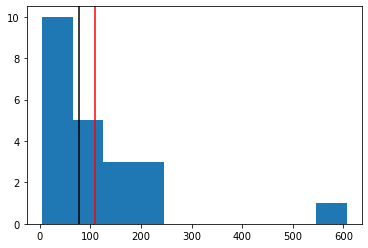

In [38]:
import numpy as np

genre_amt = np.array(genre_amt)

mean = np.mean(genre_amt)
median = np.median(genre_amt)
print(mean)
print(median)
plt.axvline(mean, color='red')
plt.axvline(median, color='black')

plt.hist(genre_amt)
plt.show()

In [39]:
groups = []

for i in genre_columns:
    i = main_df.groupby([i]).mean()
    groups.append(i)

len(groups)

22

In [40]:
genre_columns

['Comedy',
 'News',
 'Horror',
 'Crime',
 'Adventure',
 'Drama',
 'Animation',
 'Music',
 'History',
 'Documentary',
 'Sci-Fi',
 'Romance',
 'Fantasy',
 'Western',
 'Mystery',
 'Action',
 'Sport',
 'Musical',
 'War',
 'Family',
 'Biography',
 'Thriller']

In [41]:
genre_count = dict(zip(genre_columns, genre_amt))
genre_count
    

{'Comedy': 241,
 'News': 5,
 'Horror': 158,
 'Crime': 131,
 'Adventure': 106,
 'Drama': 606,
 'Animation': 28,
 'Music': 25,
 'History': 27,
 'Documentary': 159,
 'Sci-Fi': 82,
 'Romance': 95,
 'Fantasy': 47,
 'Western': 7,
 'Mystery': 79,
 'Action': 209,
 'Sport': 29,
 'Musical': 15,
 'War': 11,
 'Family': 55,
 'Biography': 75,
 'Thriller': 216}

<ipython-input-42-fe2d8c1e9464>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre, rotation=40)


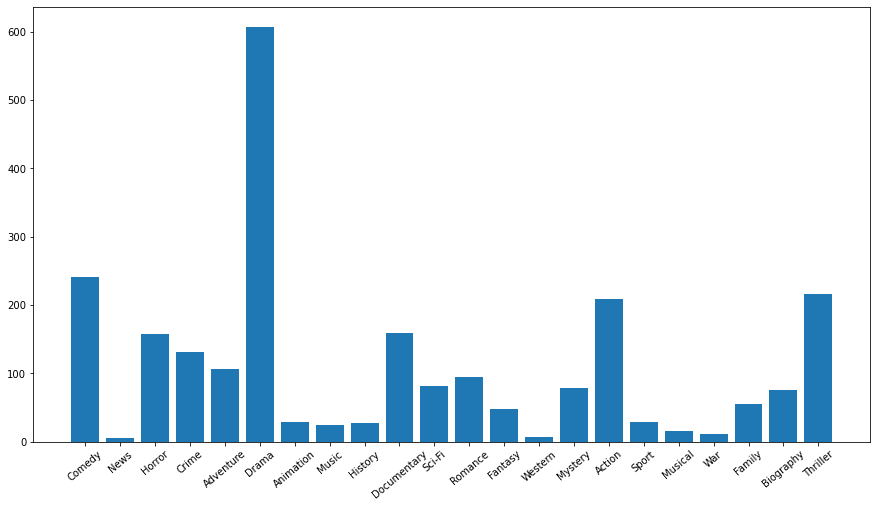

In [42]:
fig, ax = plt.subplots (figsize=(15,8))

genre = list(genre_count.keys()) 
count = list(genre_count.values())

ax.bar(genre, count)
ax.set_xticklabels(genre, rotation=40)

plt.show()

In [43]:
genre_count_sorted = {k: v for k, v in sorted(genre_count.items(), key=lambda item: item[1], reverse=True)}
genre_count_sorted

{'Drama': 606,
 'Comedy': 241,
 'Thriller': 216,
 'Action': 209,
 'Documentary': 159,
 'Horror': 158,
 'Crime': 131,
 'Adventure': 106,
 'Romance': 95,
 'Sci-Fi': 82,
 'Mystery': 79,
 'Biography': 75,
 'Family': 55,
 'Fantasy': 47,
 'Sport': 29,
 'Animation': 28,
 'History': 27,
 'Music': 25,
 'Musical': 15,
 'War': 11,
 'Western': 7,
 'News': 5}

In [44]:
list(genre_count_sorted.items())

[('Drama', 606),
 ('Comedy', 241),
 ('Thriller', 216),
 ('Action', 209),
 ('Documentary', 159),
 ('Horror', 158),
 ('Crime', 131),
 ('Adventure', 106),
 ('Romance', 95),
 ('Sci-Fi', 82),
 ('Mystery', 79),
 ('Biography', 75),
 ('Family', 55),
 ('Fantasy', 47),
 ('Sport', 29),
 ('Animation', 28),
 ('History', 27),
 ('Music', 25),
 ('Musical', 15),
 ('War', 11),
 ('Western', 7),
 ('News', 5)]

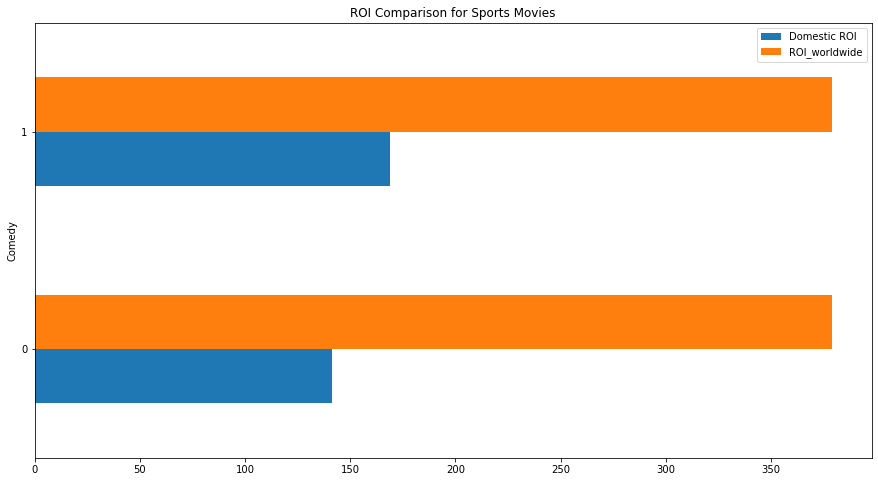

In [45]:
groups[0][['ROI_domestic', 'ROI_worldwide']].plot(kind='barh', figsize=(15,8))
plt.legend(['Domestic ROI', 'ROI_worldwide'])
plt.title('ROI Comparison for Sports Movies')

plt.show()

In [46]:
groups[0][['ROI_domestic', 'ROI_worldwide']].loc[:1]

,ROI_domestic,ROI_worldwide
Comedy,,
0,141.441067,378.763772
1,168.950555,378.772265


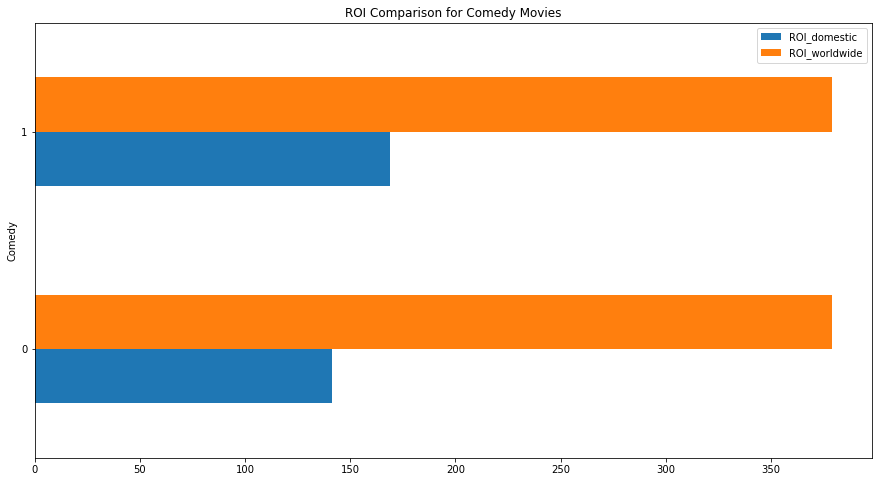

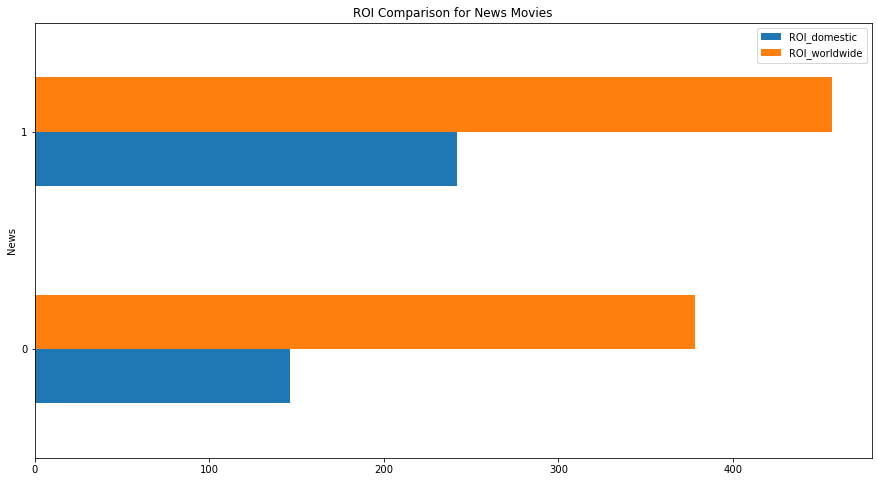

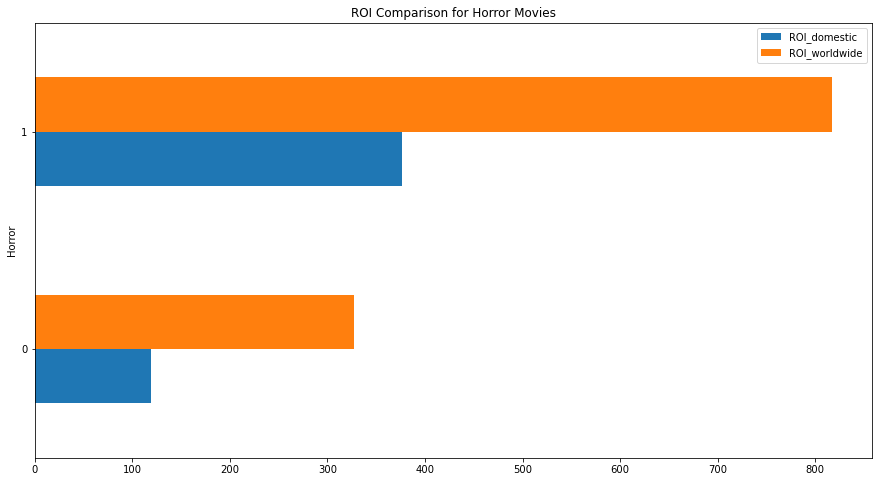

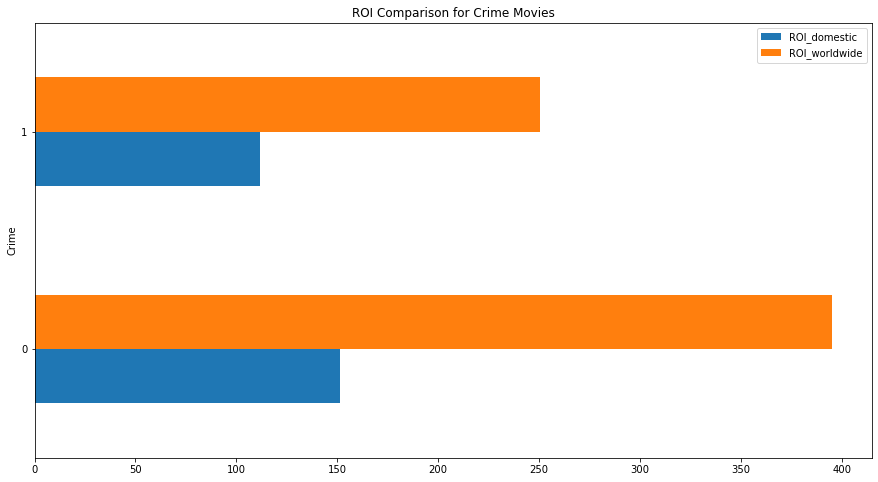

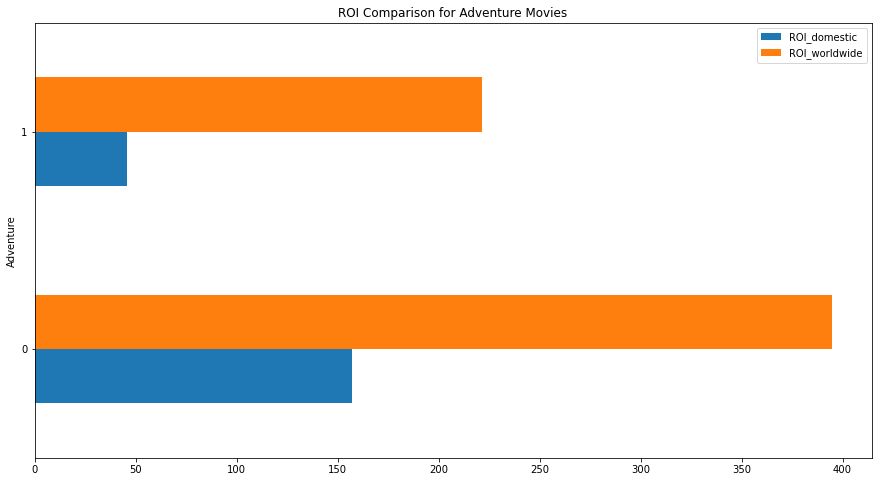

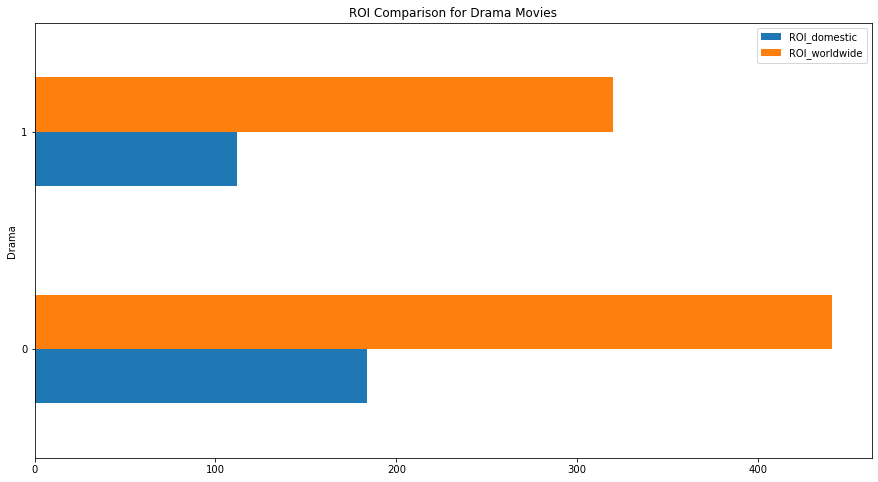

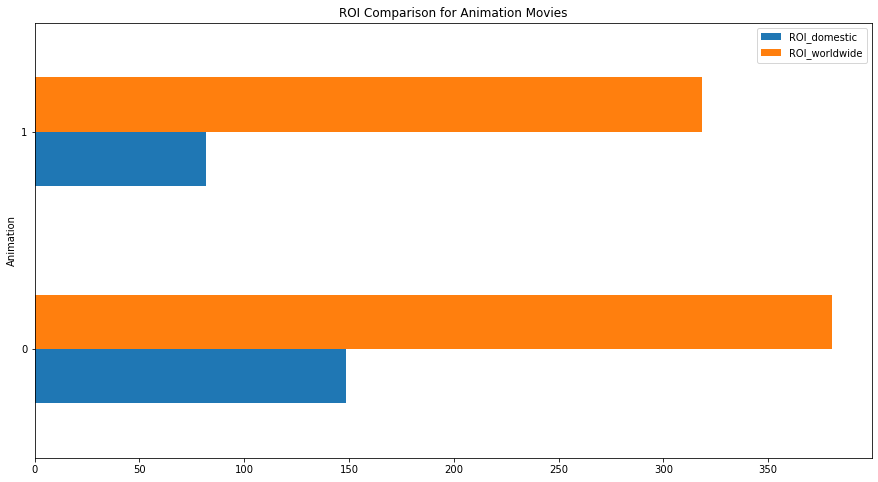

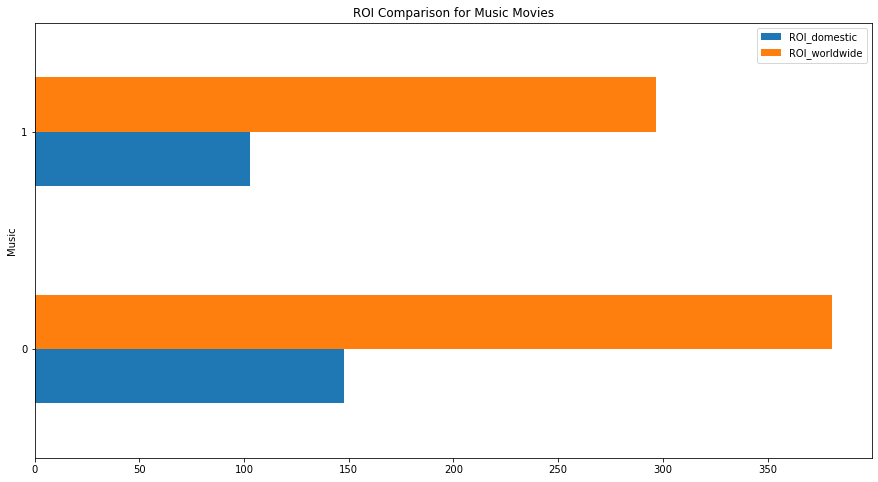

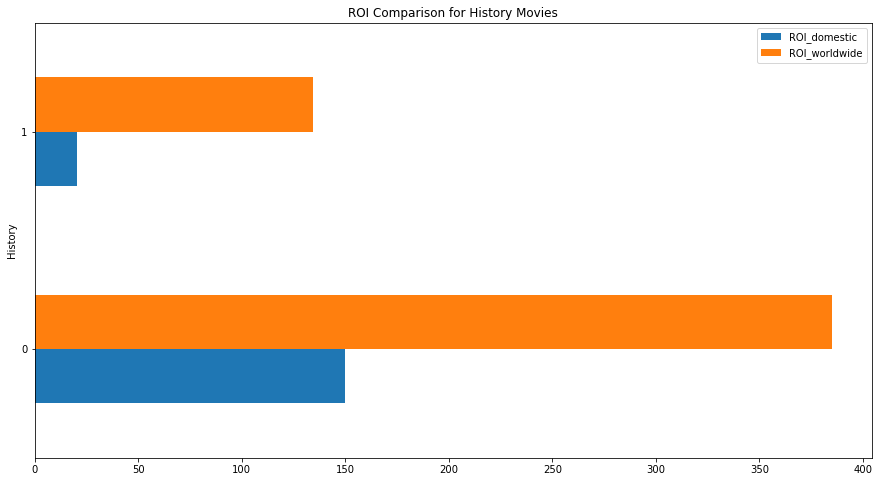

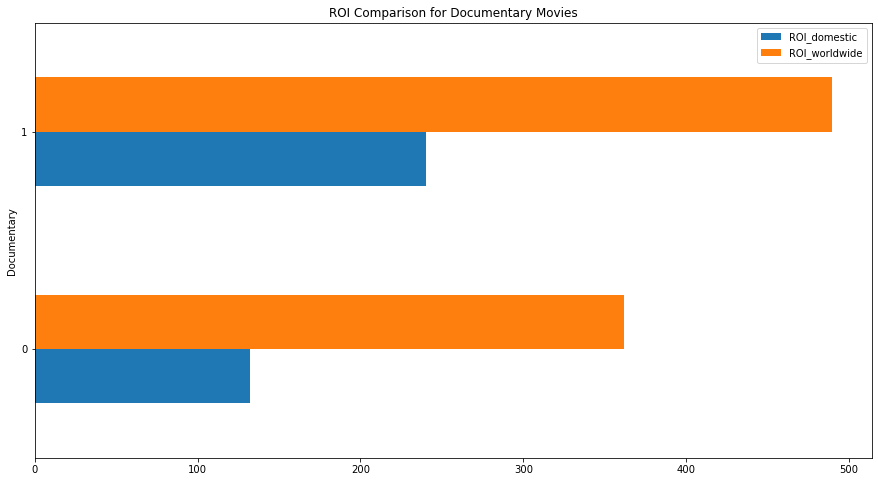

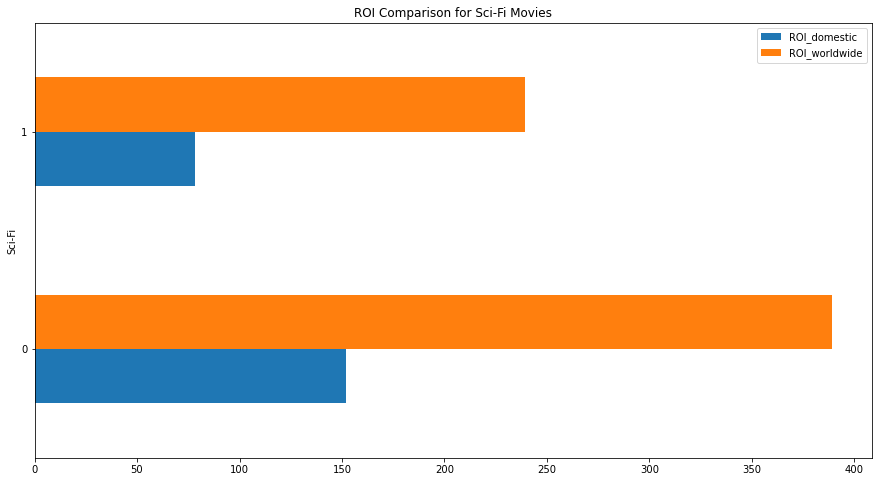

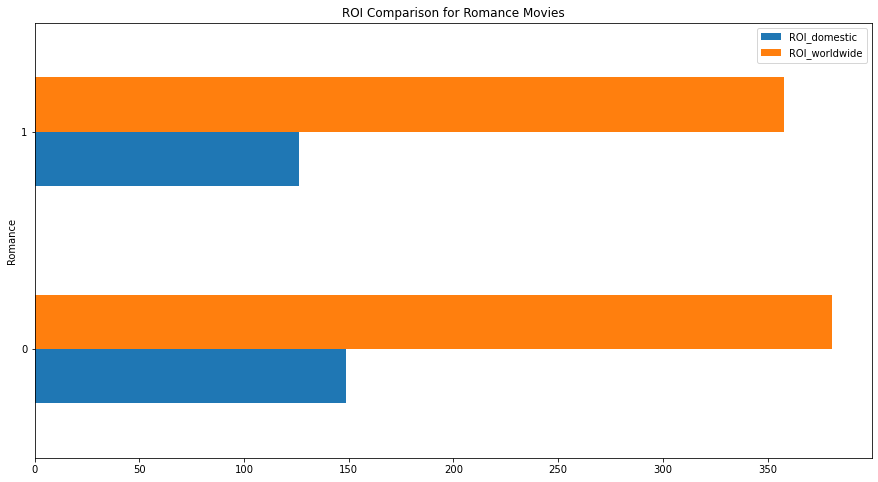

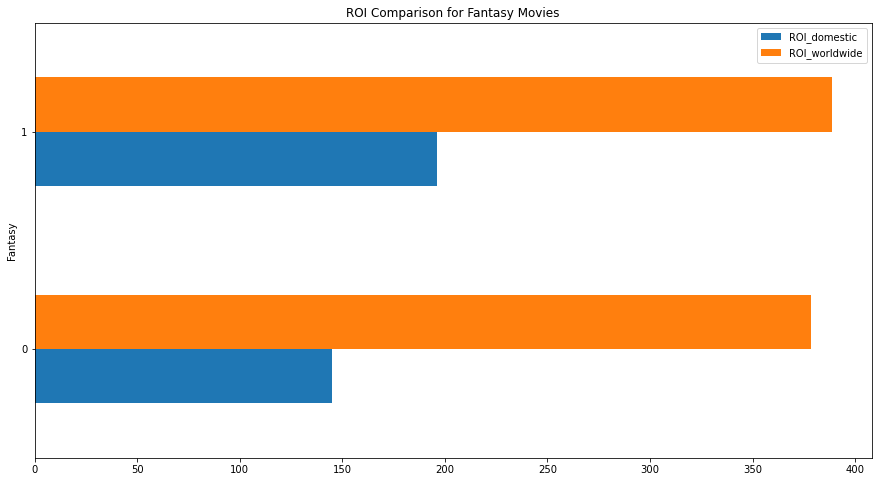

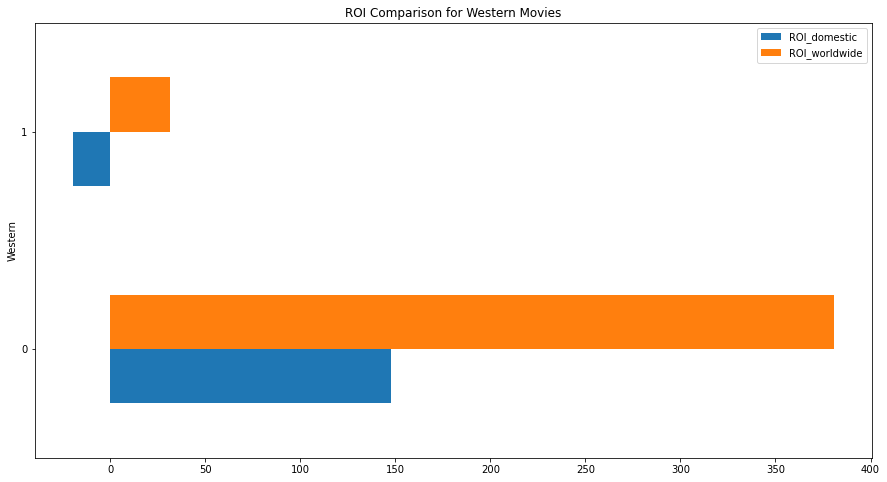

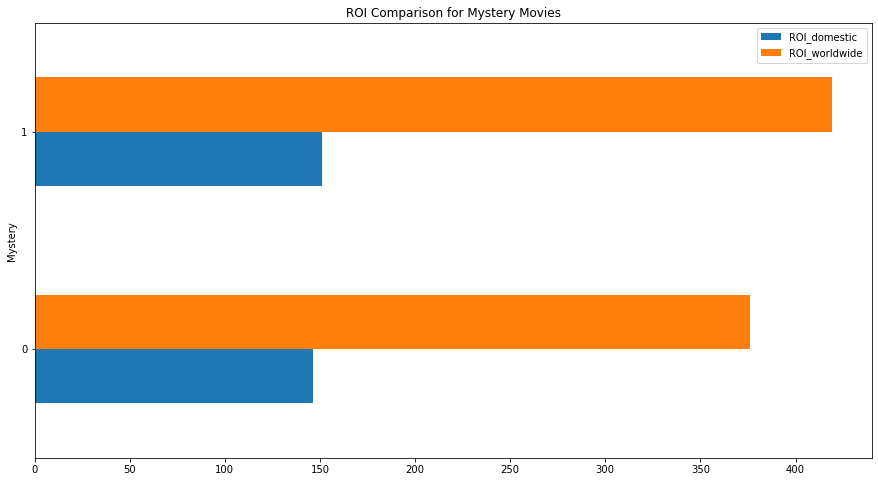

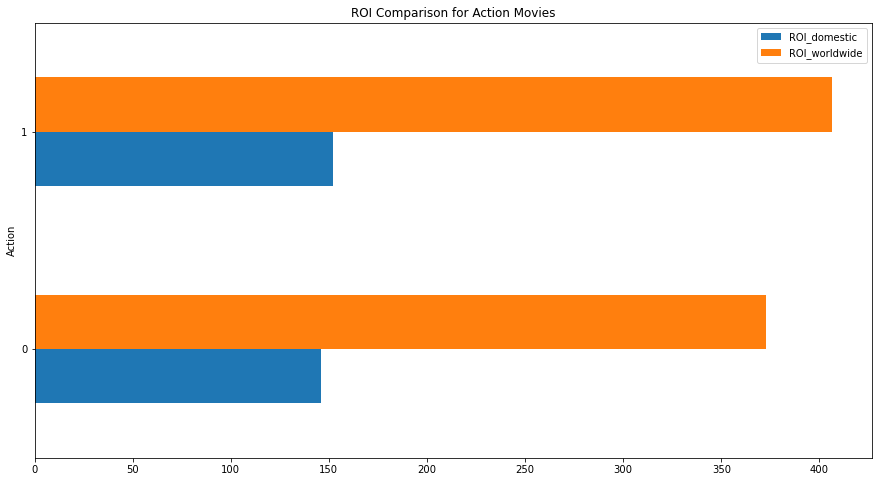

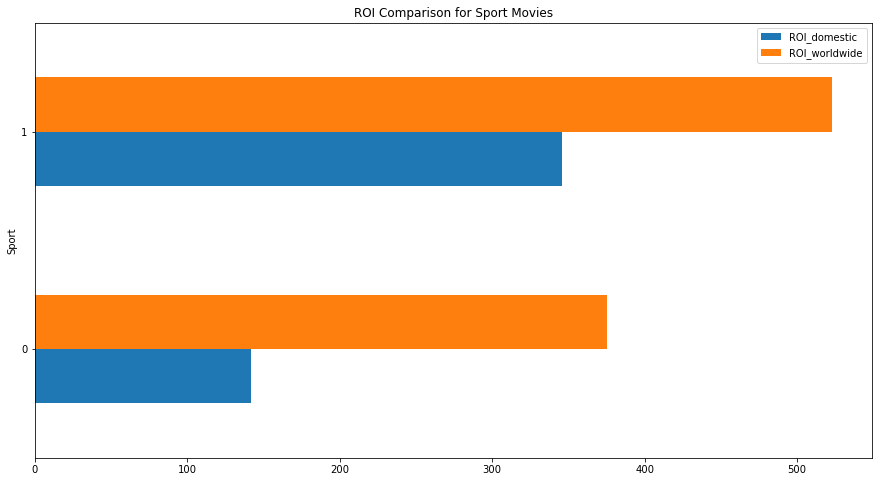

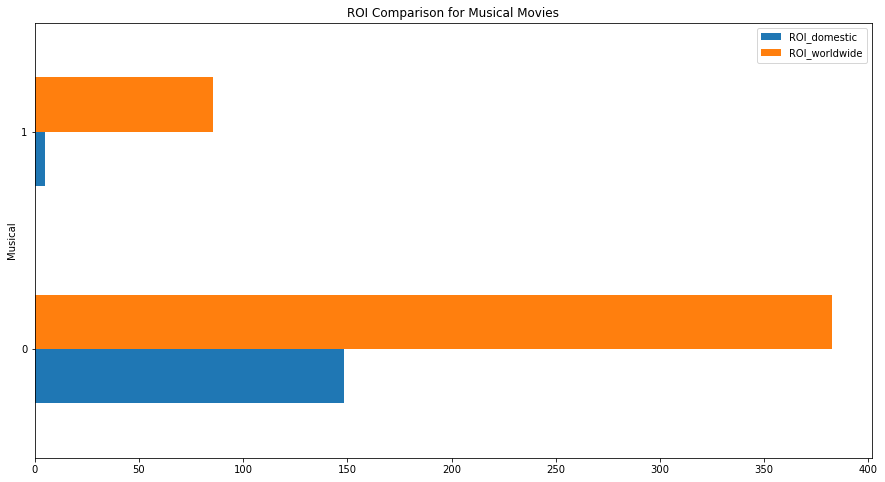

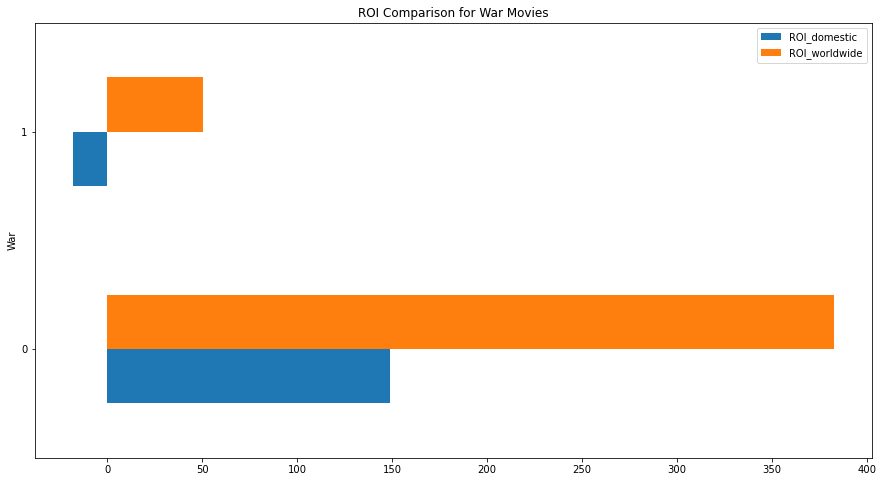

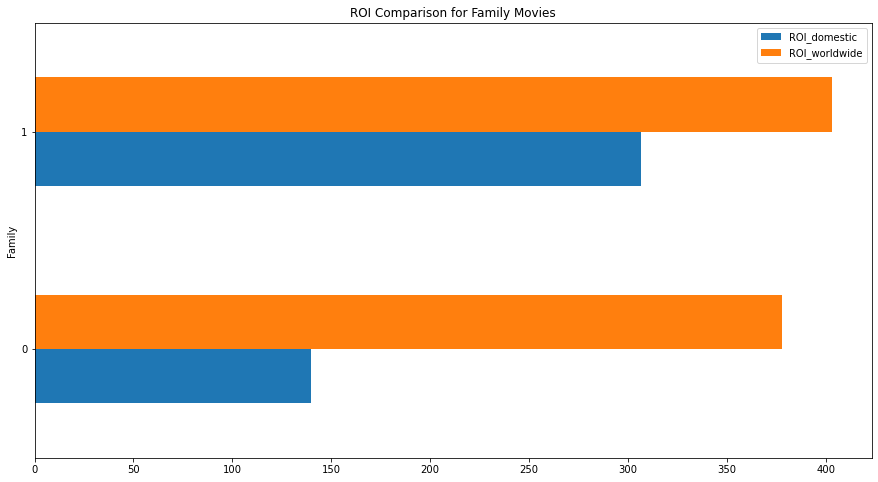

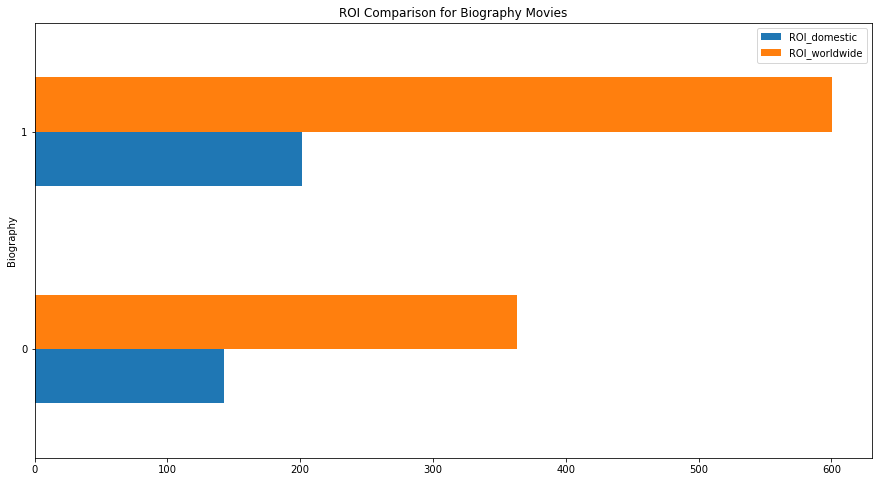

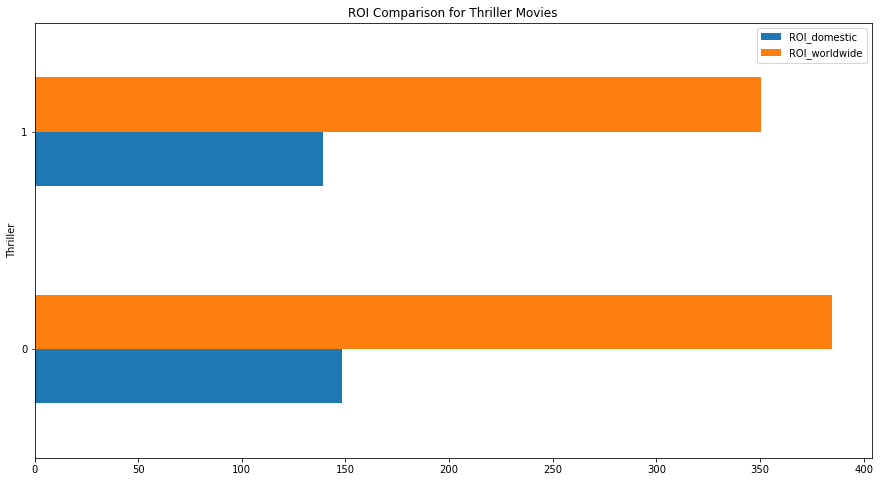

In [47]:
dct = {}

counter = 0
for i in genre_columns:
    

    groups[counter][['ROI_domestic','ROI_worldwide']].plot(kind='barh', figsize=(15,8))
    plt.legend(['ROI_domestic', 'ROI_worldwide'])
    plt.title('ROI Comparison for {} Movies'.format(i))
    
    dct[i] = list(groups[counter][['ROI_domestic', 'ROI_worldwide']].loc[1])[1]
                                                                
    plt.show()
    counter +=1

In [48]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 1227
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   movie_id                       983 non-null    object 
 1   start_year                     983 non-null    int64  
 2   runtime_minutes                902 non-null    float64
 3   genres                         983 non-null    object 
 4   averagerating                  983 non-null    float64
 5   numvotes                       983 non-null    int64  
 6   title                          983 non-null    object 
 7   id                             983 non-null    int64  
 8   release_date                   983 non-null    object 
 9   production_budget              983 non-null    float64
 10  domestic_gross                 983 non-null    float64
 11  worldwide_gross                983 non-null    float64
 12  Comedy                         983 non-null    in

In [49]:
dct

{'Comedy': 378.77226549994174,
 'News': 456.4854415311988,
 'Horror': 816.8135532657069,
 'Crime': 250.72301297780578,
 'Adventure': 221.43199800250426,
 'Drama': 319.92688954182387,
 'Animation': 318.37138750675206,
 'Music': 296.83349142746835,
 'History': 134.4928451032131,
 'Documentary': 489.2616939221421,
 'Sci-Fi': 239.4036305143359,
 'Romance': 357.70258402497257,
 'Fantasy': 388.554236752046,
 'Western': 31.473661641025636,
 'Mystery': 418.99639030420997,
 'Action': 406.2444892937693,
 'Sport': 522.6265934666958,
 'Musical': 85.43084277712944,
 'War': 50.53837489415662,
 'Family': 403.0384170234937,
 'Biography': 600.2801257009237,
 'Thriller': 350.3575687525201}

In [50]:
Worldwide_ROI_by_genres = pd.DataFrame(data=dct, index=range(1))
Worldwide_ROI_by_genres

,Comedy,News,Horror,Crime,Adventure,Drama,Animation,Music,History,Documentary,...,Fantasy,Western,Mystery,Action,Sport,Musical,War,Family,Biography,Thriller
0,378.772265,456.485442,816.813553,250.723013,221.431998,319.92689,318.371388,296.833491,134.492845,489.261694,...,388.554237,31.473662,418.99639,406.244489,522.626593,85.430843,50.538375,403.038417,600.280126,350.357569


In [51]:
Worldwide_ROI_by_genres = Worldwide_ROI_by_genres.transpose()

<AxesSubplot:>

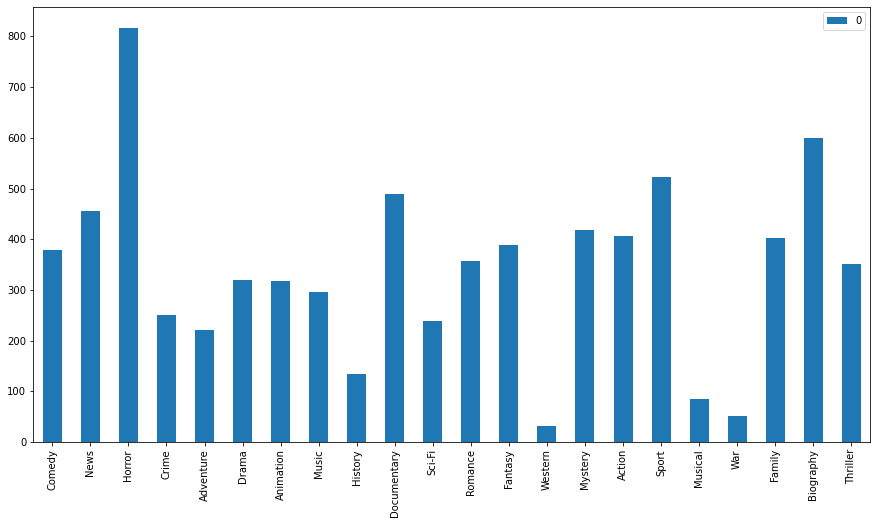

In [52]:
Worldwide_ROI_by_genres.plot(kind='bar', figsize=(15,8))

In [53]:
genre_by_ROI_worldwide_sorted = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1], reverse=True)}
genre_by_ROI_worldwide_sorted
# Sorted genres and respective worldwide ROI

{'Horror': 816.8135532657069,
 'Biography': 600.2801257009237,
 'Sport': 522.6265934666958,
 'Documentary': 489.2616939221421,
 'News': 456.4854415311988,
 'Mystery': 418.99639030420997,
 'Action': 406.2444892937693,
 'Family': 403.0384170234937,
 'Fantasy': 388.554236752046,
 'Comedy': 378.77226549994174,
 'Romance': 357.70258402497257,
 'Thriller': 350.3575687525201,
 'Drama': 319.92688954182387,
 'Animation': 318.37138750675206,
 'Music': 296.83349142746835,
 'Crime': 250.72301297780578,
 'Sci-Fi': 239.4036305143359,
 'Adventure': 221.43199800250426,
 'History': 134.4928451032131,
 'Musical': 85.43084277712944,
 'War': 50.53837489415662,
 'Western': 31.473661641025636}

In [54]:
list(genre_by_ROI_worldwide_sorted.items())[:5]
# Top 5 Genres by Worldwide ROI

[('Horror', 816.8135532657069),
 ('Biography', 600.2801257009237),
 ('Sport', 522.6265934666958),
 ('Documentary', 489.2616939221421),
 ('News', 456.4854415311988)]

In [55]:
wanted_columns = ['movie_id', 'averagerating', 'numvotes', 'num_of_genres', 'rating','ROI_worldwide', 'ROI_domestic', 'gross_profit_margin_worldwide', 'gross_profit_margin_domestic']

for i in genre_columns:
    wanted_columns.append(i)

wanted_columns
# Dataframe rearranged and filtered

['movie_id',
 'averagerating',
 'numvotes',
 'num_of_genres',
 'rating',
 'ROI_worldwide',
 'ROI_domestic',
 'gross_profit_margin_worldwide',
 'gross_profit_margin_domestic',
 'Comedy',
 'News',
 'Horror',
 'Crime',
 'Adventure',
 'Drama',
 'Animation',
 'Music',
 'History',
 'Documentary',
 'Sci-Fi',
 'Romance',
 'Fantasy',
 'Western',
 'Mystery',
 'Action',
 'Sport',
 'Musical',
 'War',
 'Family',
 'Biography',
 'Thriller']

In [56]:
filtered_df = main_df.loc[:, wanted_columns]

In [57]:
filtered_df

,movie_id,averagerating,numvotes,num_of_genres,rating,ROI_worldwide,ROI_domestic,gross_profit_margin_worldwide,gross_profit_margin_domestic,Comedy,...,Fantasy,Western,Mystery,Action,Sport,Musical,War,Family,Biography,Thriller
0,tt0339736,5.6,2420,1,good,1080.879909,296.727455,91.531738,74.793779,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0426566,6.0,13,1,good,39.330956,39.330956,28.228440,28.228440,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0436230,6.7,34,2,good,10075.949000,5226.294500,99.017291,98.122522,0,...,0,0,0,0,0,0,0,0,0,1
4,tt0437086,7.5,88207,3,great,137.044727,-49.582229,57.813869,-98.342765,0,...,0,0,0,1,0,0,0,0,0,0
5,tt0443272,7.4,228701,3,great,320.532740,180.319958,76.220639,64.326479,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,tt7961060,8.0,16465,3,great,1344.091235,257.373588,93.075230,72.018078,0,...,0,0,0,1,0,0,0,0,0,0
1221,tt7981492,4.3,971,2,bad,50.172414,-7.830484,33.409874,-8.495742,0,...,0,0,0,0,0,0,0,0,0,1
1224,tt8450662,7.3,22,1,great,-56.882100,-56.882100,-131.922241,-131.922241,0,...,0,0,0,0,0,0,0,0,0,0
1225,tt8632862,6.7,11628,1,good,33.074300,27.046120,24.854010,21.288427,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
directors = pd.read_sql("""
SELECT *
FROM directors
;
""", conn)

In [59]:
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [60]:
directors = pd.read_sql("""

SELECT primary_name AS director, movie_id
FROM persons
JOIN directors
    USING(person_id)
""", conn)

In [61]:
directors

,director,movie_id
0,Ruel S. Bayani,tt1592569
1,Ruel S. Bayani,tt1592569
2,Ruel S. Bayani,tt1592569
3,Ruel S. Bayani,tt1592569
4,Ruel S. Bayani,tt2057445
...,...,...
291166,Rama Narayanan,tt8715016
291167,Rama Narayanan,tt8919136
291168,Samir Eshra,tt8717234
291169,Pegasus Envoyé,tt8743182


In [62]:
directors.value_counts()

director              movie_id 
Dawn Cobalt           tt2249786    52
Stare Yildirim        tt2249786    52
Rick Skyler           tt2249786    52
James Cookson         tt2249786    52
Maureen Hascoet       tt2249786    52
                                   ..
Marko Terva-Aho       tt2943058     1
Marko Vrdoljak        tt3139374     1
Marko Vuorinen        tt3363840     1
                      tt6348664     1
'Atlas' Ramachandran  tt3433162     1
Length: 163295, dtype: int64

In [63]:
director_df = filtered_df.merge(directors, on='movie_id')
# Added directors data onto filtered main dataframe

In [64]:
director_df

,movie_id,averagerating,numvotes,num_of_genres,rating,ROI_worldwide,ROI_domestic,gross_profit_margin_worldwide,gross_profit_margin_domestic,Comedy,...,Western,Mystery,Action,Sport,Musical,War,Family,Biography,Thriller,director
0,tt0339736,5.6,2420,1,good,1080.879909,296.727455,91.531738,74.793779,0,...,0,0,0,0,0,0,0,0,0,Andrew Getty
1,tt0426566,6.0,13,1,good,39.330956,39.330956,28.228440,28.228440,0,...,0,0,0,0,0,0,0,0,0,Julio Bove
2,tt0426566,6.0,13,1,good,39.330956,39.330956,28.228440,28.228440,0,...,0,0,0,0,0,0,0,0,0,Julio Bove
3,tt0436230,6.7,34,2,good,10075.949000,5226.294500,99.017291,98.122522,0,...,0,0,0,0,0,0,0,0,1,Joaquin Perea
4,tt0436230,6.7,34,2,good,10075.949000,5226.294500,99.017291,98.122522,0,...,0,0,0,0,0,0,0,0,1,Joaquin Perea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,tt8632862,6.7,11628,1,good,33.074300,27.046120,24.854010,21.288427,0,...,0,0,0,0,0,0,0,0,0,Michael Moore
2237,tt9024106,6.3,5945,2,good,201.793683,201.793683,66.864780,66.864780,0,...,0,0,0,0,0,0,0,1,0,Chuck Konzelman
2238,tt9024106,6.3,5945,2,good,201.793683,201.793683,66.864780,66.864780,0,...,0,0,0,0,0,0,0,1,0,Chuck Konzelman
2239,tt9024106,6.3,5945,2,good,201.793683,201.793683,66.864780,66.864780,0,...,0,0,0,0,0,0,0,1,0,Cary Solomon


In [65]:
grouped_director = director_df.groupby(['director']).mean()
grouped_director

,averagerating,numvotes,num_of_genres,ROI_worldwide,ROI_domestic,gross_profit_margin_worldwide,gross_profit_margin_domestic,Comedy,News,Horror,...,Fantasy,Western,Mystery,Action,Sport,Musical,War,Family,Biography,Thriller
director,,,,,,,,,,,,,,,,,,,,,
Aaron Alon,7.9,9.0,2.0,-34.198857,-58.008381,-51.973044,-138.142759,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Aaron Boltz,3.0,65.0,2.0,-65.343613,-97.953088,-188.547097,-4785.406680,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Aash Aaron,8.1,16.0,1.0,260.000000,260.000000,72.222222,72.222222,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Aashiq Abu,8.6,372.0,2.0,-59.164413,-81.319080,-144.884446,-435.305542,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Abby Kohn,5.4,39936.0,2.0,186.105616,52.486253,65.047872,34.420318,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zanbo Zhang,7.7,70.0,1.0,16.826928,-67.542920,14.403296,-208.099188,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zehao Gao,5.3,12.0,3.0,446.104800,446.104800,81.688496,81.688496,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Zhi-yu Ma,5.0,10.0,2.0,2617.924114,1083.171857,96.320721,91.548142,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
unstack_director = grouped_director[['ROI_domestic', 'ROI_worldwide']].unstack().unstack()
unstack_director

director,Aaron Alon,Aaron Boltz,Aash Aaron,Aashiq Abu,Abby Kohn,Abhijit Guha,Adam McKay,Adam Montierth,Adam Shankman,Adam Shaw,...,Yoshikazu Ishii,Yossi Madmoni,Youssef Delara,Zach Braff,Zal Batmanglij,Zanbo Zhang,Zehao Gao,Zhi-yu Ma,Zuri Rinpoche,Ömür Atay
ROI_domestic,-58.008381,-97.953088,260.0,-81.319080,52.486253,7.138665,-20.272863,-98.834667,173.059515,1245.3767,...,155.048421,-99.840496,128.02856,87.577254,-65.005400,-67.542920,446.1048,1083.171857,88.9445,-42.581667
ROI_worldwide,-34.198857,-65.343613,260.0,-59.164413,186.105616,200.765736,18.138618,-98.834667,249.559515,2876.1302,...,730.307895,-40.897943,135.23288,227.802413,-53.416062,16.826928,446.1048,2617.924114,88.9445,55.302396


In [67]:
columns_list = list(unstack_director.columns)
columns_list

['Aaron Alon',
 'Aaron Boltz',
 'Aash Aaron',
 'Aashiq Abu',
 'Abby Kohn',
 'Abhijit Guha',
 'Adam McKay',
 'Adam Montierth',
 'Adam Shankman',
 'Adam Shaw',
 'Adam Starks',
 'Adam Vermillion',
 'Adam Wingard',
 'Aditya Om',
 'Adolfo Cantu-Villarreal',
 'Ahmad Bargouthi',
 'Aisha Bulahova',
 'Aishwarya Dhanush',
 'Al Ghanekar',
 'Alain Desrochers',
 'Alastair Siddons',
 'Albert Maysles',
 'Albin Joseph',
 'Alec Ziff',
 'Alejandro Fernández Almendras',
 'Alejandro G. Iñárritu',
 'Alejo Rébora',
 'Aleksandra Strelyanaya',
 'Alex Alessi',
 "Alex D'Lerma",
 'Alex Garland',
 'Alex Gibney',
 'Alex Kendrick',
 'Alex Zinzopoulos',
 'Alexander Payne',
 'Alfonso Cuarón',
 'Ali Abbas Zafar',
 'Ali Ahmadzade',
 'Alister Grierson',
 'Andrea Arnold',
 'Andrew Cohn',
 'Andrew Erwin',
 'Andrew Getty',
 'Andrew Niccol',
 'Andrew Tiernan',
 'Andrey Bulahov',
 'André-Line Beauparlant',
 'Andy Tennant',
 'Angel Delgado',
 'Angel Manuel Soto',
 'Angelina Jolie',
 'Angelo Milano',
 'Angus Benfield',
 'Anil 

In [68]:
grouped_director = director_df.groupby(['director'])['ROI_worldwide'].mean()
grouped_director

director
Aaron Alon        -34.198857
Aaron Boltz       -65.343613
Aash Aaron        260.000000
Aashiq Abu        -59.164413
Abby Kohn         186.105616
                    ...     
Zanbo Zhang        16.826928
Zehao Gao         446.104800
Zhi-yu Ma        2617.924114
Zuri Rinpoche      88.944500
Ömür Atay          55.302396
Name: ROI_worldwide, Length: 1015, dtype: float64

In [69]:
unstack_director['Aaron Alon']

ROI_domestic    -58.008381
ROI_worldwide   -34.198857
Name: Aaron Alon, dtype: float64

In [70]:
director_dct = {}
lst = list(unstack_director.columns)
for i in lst:
    director_dct[i] = unstack_director[i][1]

In [71]:
director_dct

{'Aaron Alon': -34.19885714285714,
 'Aaron Boltz': -65.3436125,
 'Aash Aaron': 260.0,
 'Aashiq Abu': -59.16441333333333,
 'Abby Kohn': 186.105615625,
 'Abhijit Guha': 200.7657355714286,
 'Adam McKay': 18.138618333333334,
 'Adam Montierth': -98.83466666666665,
 'Adam Shankman': 249.55951499999998,
 'Adam Shaw': 2876.1302,
 'Adam Starks': -24.5022375,
 'Adam Vermillion': -76.20573333333334,
 'Adam Wingard': 2588.7177,
 'Aditya Om': 14.250858585858586,
 'Adolfo Cantu-Villarreal': 80.55090517241379,
 'Ahmad Bargouthi': 277.4191,
 'Aisha Bulahova': 417.23644,
 'Aishwarya Dhanush': -95.89594444444445,
 'Al Ghanekar': -81.27843150684932,
 'Alain Desrochers': -89.71858571428571,
 'Alastair Siddons': 388.1348525714286,
 'Albert Maysles': 1.4632545454545456,
 'Albin Joseph': 2757.1428571428573,
 'Alec Ziff': 158.50220789473684,
 'Alejandro Fernández Almendras': 181.866725,
 'Alejandro G. Iñárritu': -29.46421714285714,
 'Alejo Rébora': -45.39011666666667,
 'Aleksandra Strelyanaya': 402.3715136363

In [72]:
director_ROI = pd.DataFrame(data=director_dct, index=range(1))
director_ROI

,Aaron Alon,Aaron Boltz,Aash Aaron,Aashiq Abu,Abby Kohn,Abhijit Guha,Adam McKay,Adam Montierth,Adam Shankman,Adam Shaw,...,Yoshikazu Ishii,Yossi Madmoni,Youssef Delara,Zach Braff,Zal Batmanglij,Zanbo Zhang,Zehao Gao,Zhi-yu Ma,Zuri Rinpoche,Ömür Atay
0,-34.198857,-65.343613,260.0,-59.164413,186.105616,200.765736,18.138618,-98.834667,249.559515,2876.1302,...,730.307895,-40.897943,135.23288,227.802413,-53.416062,16.826928,446.1048,2617.924114,88.9445,55.302396


In [73]:
director_ROI = director_ROI.transpose()

In [74]:
director_ROI

,0
Aaron Alon,-34.198857
Aaron Boltz,-65.343613
Aash Aaron,260.000000
Aashiq Abu,-59.164413
Abby Kohn,186.105616
...,...
Zanbo Zhang,16.826928
Zehao Gao,446.104800
Zhi-yu Ma,2617.924114
Zuri Rinpoche,88.944500


In [75]:
data_Drama = director_df[(director_df.Drama == 1)]
data_Drama
# Need to create a separate dataframe for each genre
# drama dataframe

,movie_id,averagerating,numvotes,num_of_genres,rating,ROI_worldwide,ROI_domestic,gross_profit_margin_worldwide,gross_profit_margin_domestic,Comedy,...,Western,Mystery,Action,Sport,Musical,War,Family,Biography,Thriller,director
1,tt0426566,6.0,13,1,good,39.330956,39.330956,28.228440,28.228440,0,...,0,0,0,0,0,0,0,0,0,Julio Bove
2,tt0426566,6.0,13,1,good,39.330956,39.330956,28.228440,28.228440,0,...,0,0,0,0,0,0,0,0,0,Julio Bove
8,tt0443272,7.4,228701,3,great,320.532740,180.319958,76.220639,64.326479,0,...,0,0,0,0,0,0,0,1,0,Steven Spielberg
9,tt0443272,7.4,228701,3,great,320.532740,180.319958,76.220639,64.326479,0,...,0,0,0,0,0,0,0,1,0,Steven Spielberg
17,tt0470752,7.7,424542,3,great,195.064554,95.699777,66.109111,48.901321,0,...,0,1,0,0,0,0,0,0,0,Alex Garland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,tt7799386,7.0,234,1,great,-5.384160,-45.618432,-5.690548,-83.885834,0,...,0,0,0,0,0,0,0,0,0,Antoine Raimbault
2237,tt9024106,6.3,5945,2,good,201.793683,201.793683,66.864780,66.864780,0,...,0,0,0,0,0,0,0,1,0,Chuck Konzelman
2238,tt9024106,6.3,5945,2,good,201.793683,201.793683,66.864780,66.864780,0,...,0,0,0,0,0,0,0,1,0,Chuck Konzelman
2239,tt9024106,6.3,5945,2,good,201.793683,201.793683,66.864780,66.864780,0,...,0,0,0,0,0,0,0,1,0,Cary Solomon


In [79]:
director_data_Drama = data_Drama.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Drama
# Filtering dirctors and their average ROI by genre (need to do it for each genre)

,ROI_worldwide
director,
Aaron Alon,-34.198857
Aaron Boltz,-65.343613
Aashiq Abu,-59.164413
Adam McKay,18.138618
Adam Shaw,2876.130200
...,...
Youssef Delara,135.232880
Zal Batmanglij,-53.416062
Zehao Gao,446.104800


In [80]:
director_data_Drama.sort_values(by='ROI_worldwide', ascending=False).iloc[0:10]
# Finding top 10 ROI director by (each) genre

,ROI_worldwide
director,
Sujit Mondal,22400.000000
Brandon Camp,6211.912000
Lawrence Côté-Collins,5479.296120
Jono Oliver,4527.777529
Muzaffer Özdemir,4527.777529
Fien Troch,4527.777529
Chao Wang,3554.385965
Adam Shaw,2876.130200
Gregori J. Martin,2876.130200


<AxesSubplot:xlabel='director'>

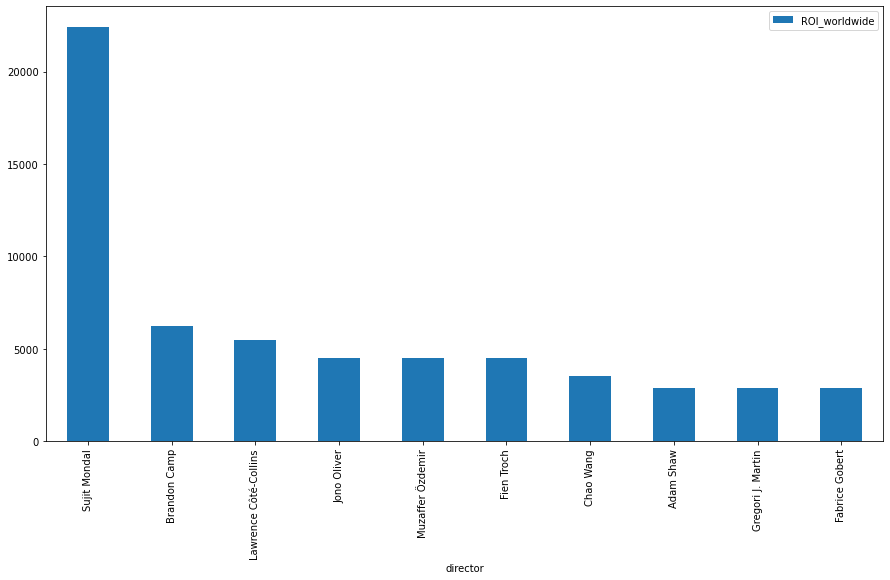

In [81]:
director_data_Drama.sort_values(by='ROI_worldwide', ascending=False).iloc[0:10].plot(kind='bar', figsize=(15,8))


In [86]:
data_Horror = director_df[(director_df.Horror == 1)]
data_Biography = director_df[(director_df.Biography == 1)]
data_Sport = director_df[(director_df.Sport == 1)]
data_Documentary = director_df[(director_df.Documentary == 1)]
data_News = director_df[(director_df.News == 1)]
data_Mystery = director_df[(director_df.Mystery == 1)]
data_Action = director_df[(director_df.Action == 1)]
data_Family = director_df[(director_df.Family == 1)]
data_Fantasy = director_df[(director_df.Fantasy == 1)]
data_Comedy = director_df[(director_df.Comedy == 1)]
data_Romance = director_df[(director_df.Romance == 1)]
data_Thriller = director_df[(director_df.Thriller == 1)]
data_Drama = director_df[(director_df.Drama == 1)]
data_Animation = director_df[(director_df.Animation == 1)]
data_Music = director_df[(director_df.Music == 1)]
data_Crime = director_df[(director_df.Crime == 1)]
data_SciFi = director_df[(director_df['Sci-Fi'] == 1)]
data_Adventure = director_df[(director_df.Adventure == 1)]
data_History = director_df[(director_df.History == 1)]
data_Musical = director_df[(director_df.Muscial == 1)]
data_War = director_df[(director_df.War == 1)]
data_Western = director_df[(director_df.Western == 1)]

# Separate dataframe for each genre

AttributeError: 'DataFrame' object has no attribute 'Muscial'

In [89]:
genre_count_sorted

{'Drama': 606,
 'Comedy': 241,
 'Thriller': 216,
 'Action': 209,
 'Documentary': 159,
 'Horror': 158,
 'Crime': 131,
 'Adventure': 106,
 'Romance': 95,
 'Sci-Fi': 82,
 'Mystery': 79,
 'Biography': 75,
 'Family': 55,
 'Fantasy': 47,
 'Sport': 29,
 'Animation': 28,
 'History': 27,
 'Music': 25,
 'Musical': 15,
 'War': 11,
 'Western': 7,
 'News': 5}

In [91]:
data_Horror = director_df[(director_df.Horror == 1)]
data_Biography = director_df[(director_df.Biography == 1)]
data_Documentary = director_df[(director_df.Documentary == 1)]
data_Mystery = director_df[(director_df.Mystery == 1)]
data_Action = director_df[(director_df.Action == 1)]
data_Comedy = director_df[(director_df.Comedy == 1)]
data_Romance = director_df[(director_df.Romance == 1)]
data_Thriller = director_df[(director_df.Thriller == 1)]
data_Drama = director_df[(director_df.Drama == 1)]
data_Crime = director_df[(director_df.Crime == 1)]
data_SciFi = director_df[(director_df['Sci-Fi'] == 1)]
data_Adventure = director_df[(director_df.Adventure == 1)]

# Picked out the genre with more than 75 movies


In [95]:
director_data_Horror = data_Horror.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Biography = data_Biography.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Documentary = data_Documentary.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Mystery = data_Mystery.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Action = data_Action.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Comedy = data_Comedy.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Romance = data_Romance.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Thriller = data_Thriller.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Drama = data_Drama.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Crime = data_Crime.groupby(['director'])[['ROI_worldwide']].mean()
director_data_SciFi = data_SciFi.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Adventure = data_Adventure.groupby(['director'])[['ROI_worldwide']].mean()


In [98]:
genre_by_ROI_worldwide_sorted

{'Horror': 816.8135532657069,
 'Biography': 600.2801257009237,
 'Documentary': 489.2616939221421,
 'Mystery': 418.99639030420997,
 'Action': 406.2444892937693,
 'Comedy': 378.77226549994174,
 'Romance': 357.70258402497257,
 'Thriller': 350.3575687525201,
 'Drama': 319.92688954182387,
 'Crime': 250.72301297780578,
 'Sci-Fi': 239.4036305143359,
 'Adventure': 221.43199800250426}

Filtered genre by ROI worldwide (movie count > 75)

{'Horror': 816.8135532657069,
 'Biography': 600.2801257009237,
 'Documentary': 489.2616939221421,
 'Mystery': 418.99639030420997,
 'Action': 406.2444892937693,
 'Comedy': 378.77226549994174,
 'Romance': 357.70258402497257,
 'Thriller': 350.3575687525201,
 'Drama': 319.92688954182387,
 'Crime': 250.72301297780578,
 'Sci-Fi': 239.4036305143359,
 'Adventure': 221.43199800250426}

In [102]:
list(genre_by_ROI_worldwide_sorted.keys())[:5]
# Top 5 ROI Worldwide Genre

['Horror', 'Biography', 'Documentary', 'Mystery', 'Action']

In [103]:
director_data_Horror = data_Horror.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Biography = data_Biography.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Documentary = data_Documentary.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Mystery = data_Mystery.groupby(['director'])[['ROI_worldwide']].mean()
director_data_Action = data_Action.groupby(['director'])[['ROI_worldwide']].mean()

<AxesSubplot:xlabel='director'>

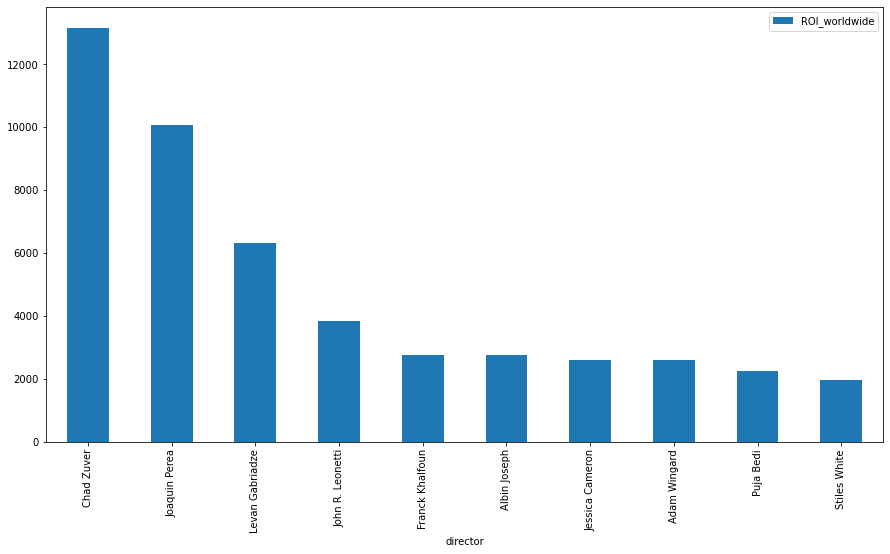

In [104]:
director_data_Horror.sort_values(by='ROI_worldwide', ascending=False).iloc[0:10].plot(kind='bar', figsize=(15,8))

<AxesSubplot:xlabel='director'>

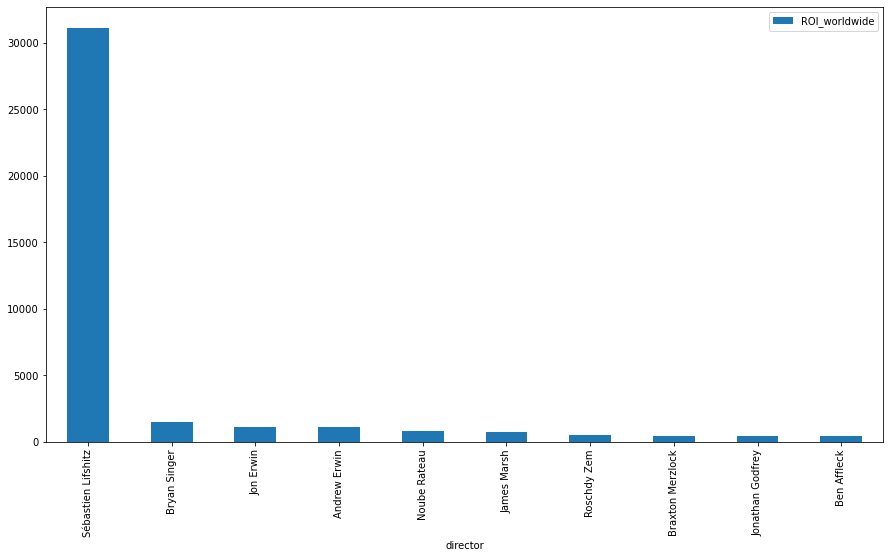

In [105]:
director_data_Biography.sort_values(by='ROI_worldwide', ascending=False).iloc[0:10].plot(kind='bar', figsize=(15,8))

<AxesSubplot:xlabel='director'>

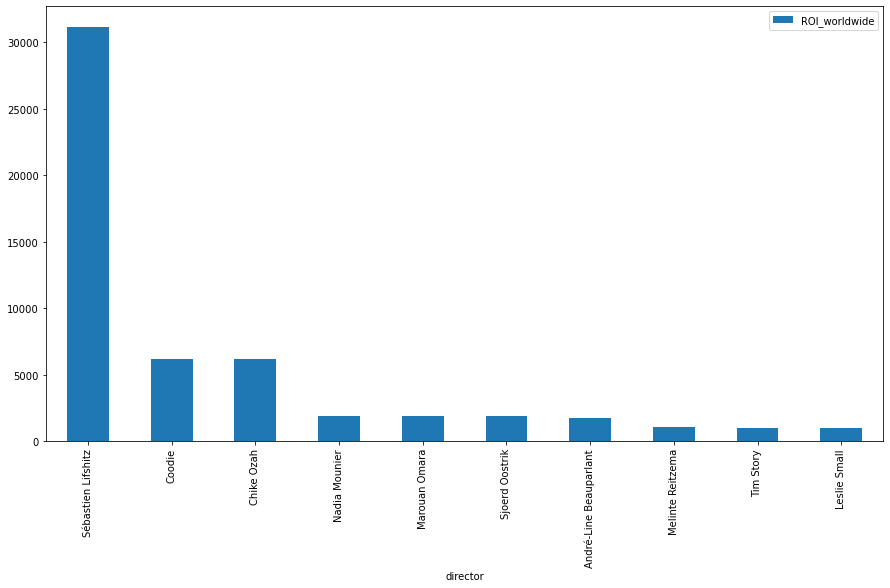

In [106]:
director_data_Documentary.sort_values(by='ROI_worldwide', ascending=False).iloc[0:10].plot(kind='bar', figsize=(15,8))

<AxesSubplot:xlabel='director'>

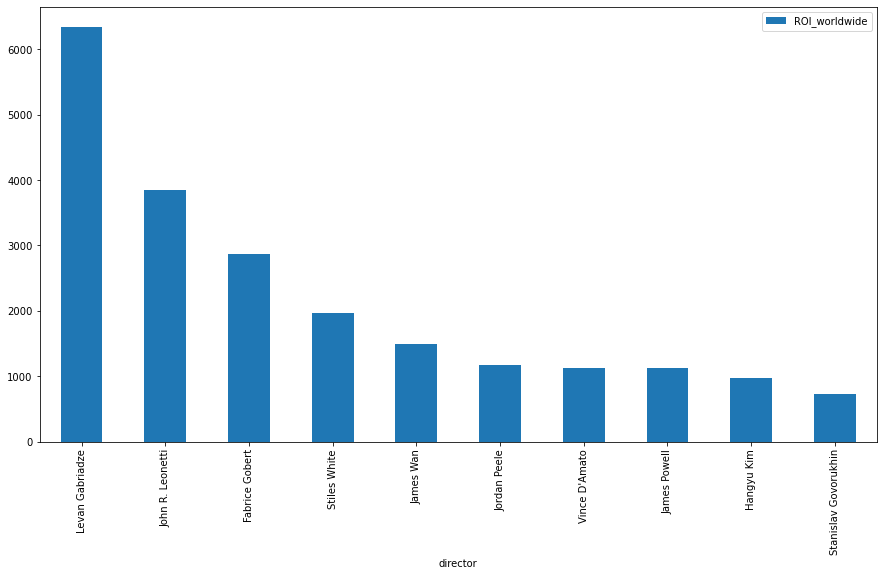

In [107]:
director_data_Mystery.sort_values(by='ROI_worldwide', ascending=False).iloc[0:10].plot(kind='bar', figsize=(15,8))

<AxesSubplot:xlabel='director'>

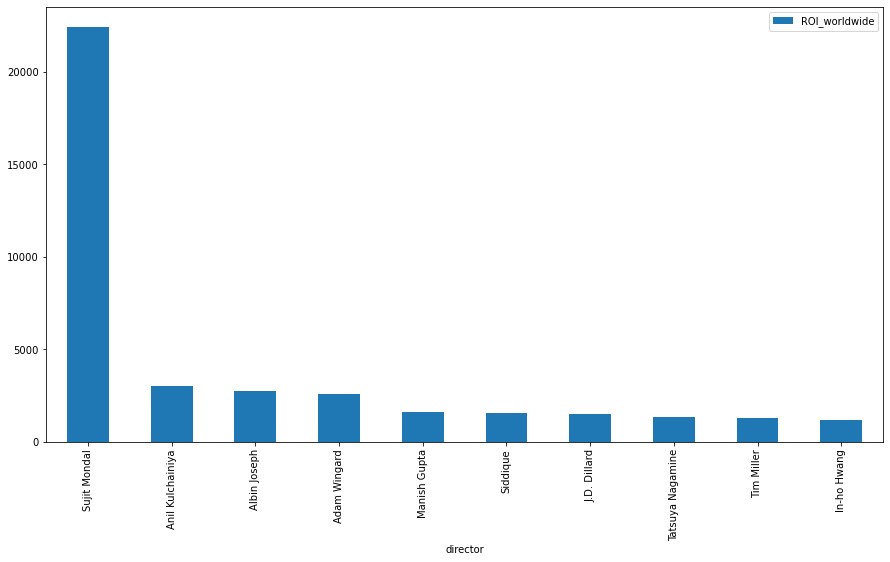

In [108]:
director_data_Action.sort_values(by='ROI_worldwide', ascending=False).iloc[0:10].plot(kind='bar', figsize=(15,8))